In [2]:
import numpy as np
import pandas as pd
from os import environ
import seaborn as sns
import tqdm.auto as tqdm
from analysis.utils import module_reload

module_reload('analysis')
from analysis.plot_matplotlib import plot_hist
import matplotlib.pyplot as plt
print(environ['LD_LIBRARY_PATH'])

from analysis.import_data import import_true_reco
from analysis.calc import get_kinematics
from analysis.nis.IFlowIntegrator import IFlowIntegrator, build_mem_integrand

# Example for adding to LD_LIBRARY_PATH:
# in CONDA_ENV_ROOT/etc/conda/activate.d/env_vars.sh

# #!/bin/sh
# export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/root/ILCSoft/LCIO/build/lib64:/root/ILCSoft/Physsim/lib64:/root/miniforge3/envs/graphjet_pyg/lib

/nfs/dust/ilc/user/bliewert/miniconda3/envs/py37/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/afs/desy.de/user/b/bliewert/public/ILCSoft/LCIO/lib64:/afs/desy.de/user/b/bliewert/public/ILCSoft/Physsim/lib64:


In [3]:
df = import_true_reco()

Using cached file from /nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/cache/comparison_reco_zhh_zzh.npy
Correcting 56590 entries (56.55%)


In [4]:
from math import pi

boundaries = np.array([
    [0, pi],
    [-pi, pi],
    [0, 200],
    
    [0, pi],
    [-pi, pi],
    
    [0, 200],
    [0, pi]
], dtype=np.float64)

reco_kin = get_kinematics(df, False, i=2233, perm=[1,2,3,4])

In [8]:
def a():
    return ((1, 2), 3)

In [16]:
print(f'{str({ "asd": np.array([0, 1, 3]) })}')

{'asd': array([0, 1, 3])}


In [9]:
(c,d) ,e = a()

In [11]:
e

3

In [7]:
import tensorflow as tf

iflow_args = {}

integrand = build_mem_integrand(reco_kin)
integrator = IFlowIntegrator(integrand=integrand, boundaries=boundaries, **iflow_args)

means, stddevs, losses = integrator.means, integrator.stddevs, integrator.losses
tot_res, tot_uncert = integrator.integrate(nepochs=10)
print(f'{tot_res:.2E} +/- {tot_uncert:.2E}')

tf.keras.backend.clear_session()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense (Dense)                (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 364)               93548     
Total params: 291,948
Trainable params: 291,948
Non-trainable params: 0
_______________________________________________________

(<Figure size 2000x1000 with 7 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
       dtype=object))

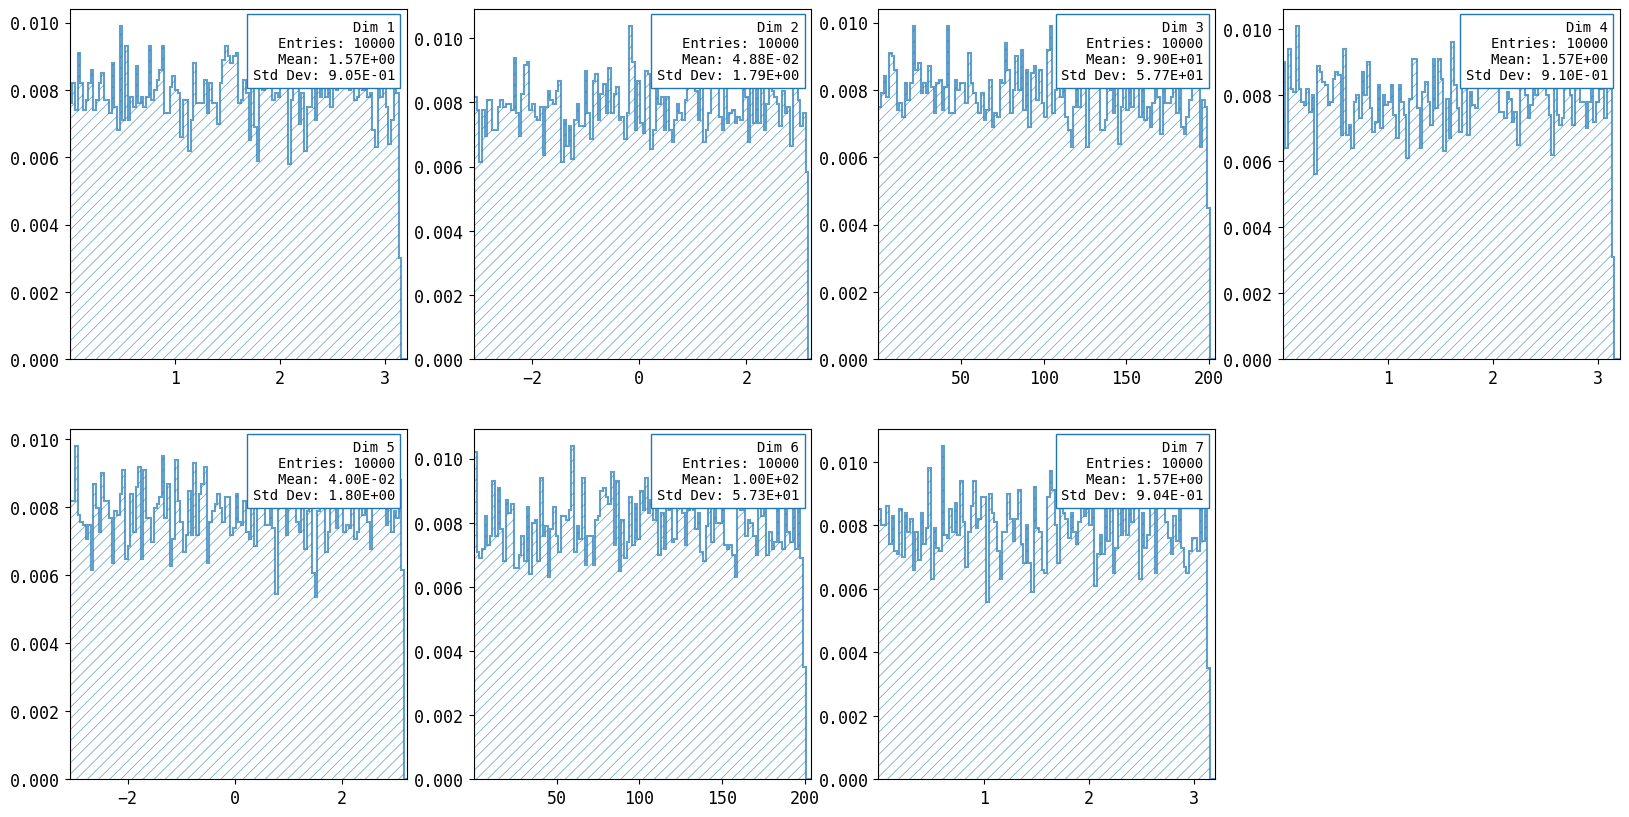

In [7]:
integrator.plot_marginals()

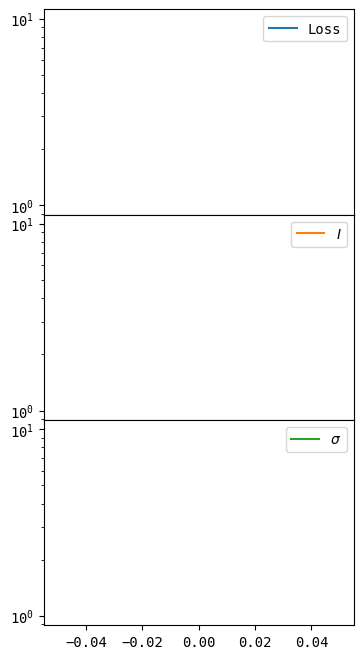

In [9]:
integrator.plot_summary();

2024-03-27 12:57:25.779135: W tensorflow/python/util/util.cc:329] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


PS points given:found [5000:514] ( 10.28 %) 
Epoch:   0 Loss = 5.479446e+01 Integral = 1.374576e-28 +/- 8.739999e-29 Total uncertainty = 8.739999e-29
PS points given:found [5000:582] ( 11.64 %) 
PS points given:found [5000:581] ( 11.62 %) 
PS points given:found [5000:539] ( 10.78 %) 
PS points given:found [5000:581] ( 11.62 %) 
PS points given:found [5000:605] ( 12.10 %) 
PS points given:found [5000:585] ( 11.70 %) 
PS points given:found [5000:607] ( 12.14 %) 
PS points given:found [5000:617] ( 12.34 %) 
PS points given:found [5000:663] ( 13.26 %) 
1.45E-29 +/- 3.16E-30


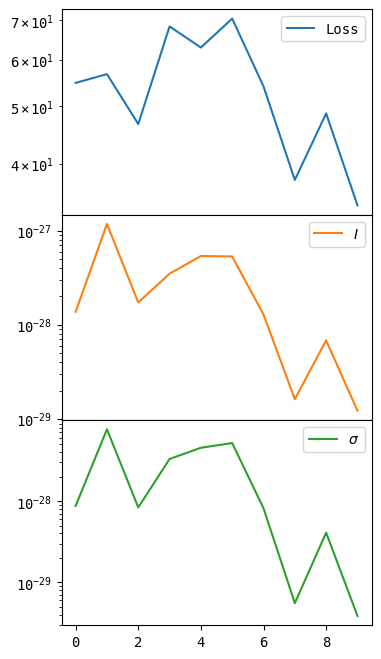

In [12]:
integrator.plot_summary();

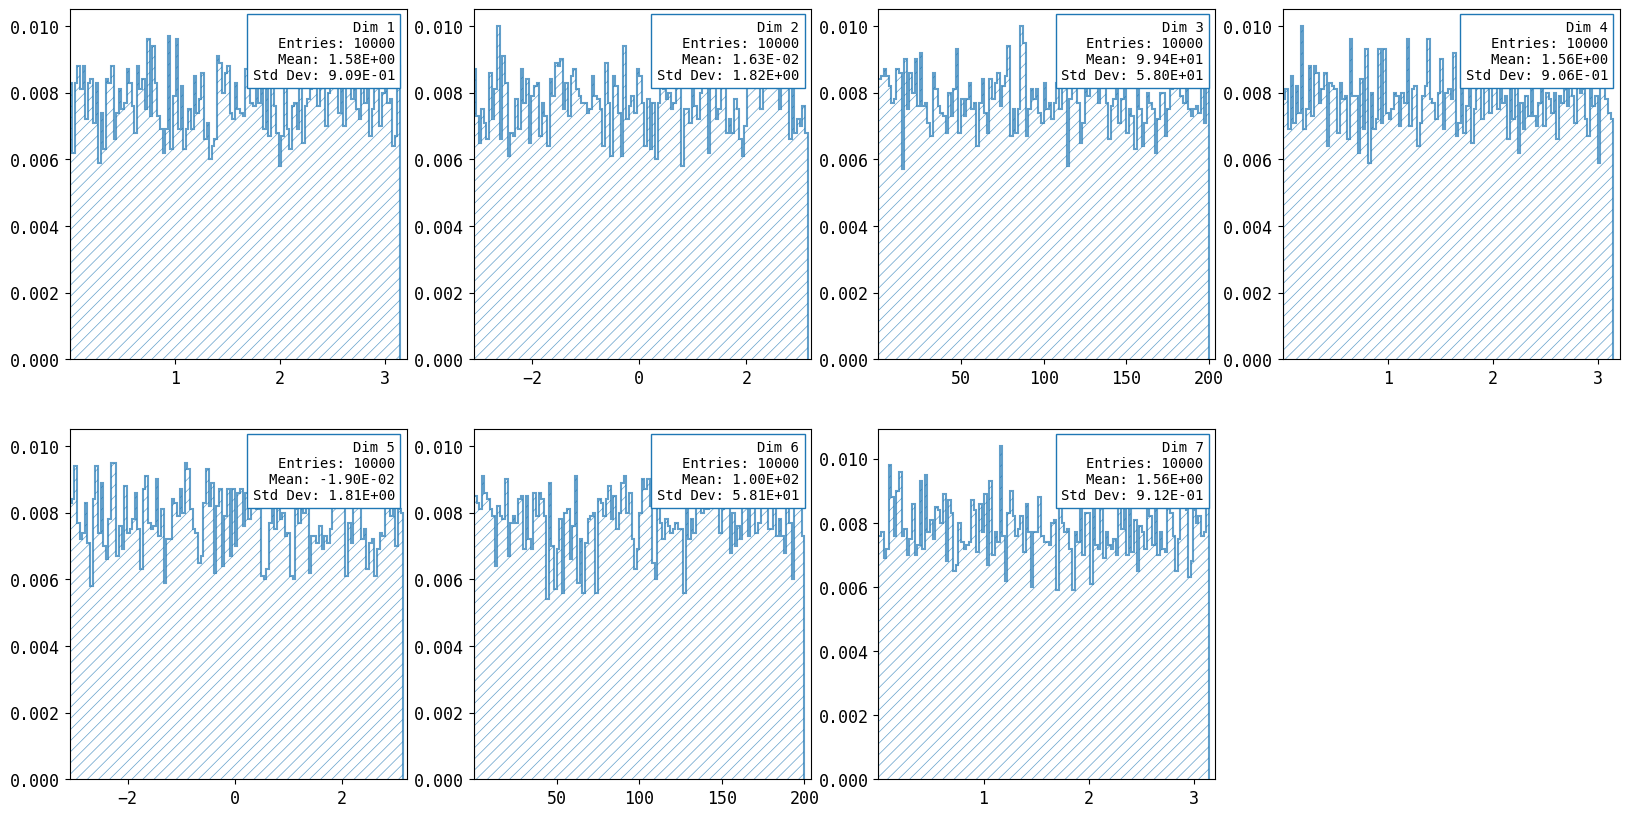

In [10]:
plot_marginals(dist, separate=True);

In [11]:
#from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())
integrand = build_integrand(reco_kin)

In [13]:
#@tf.function(input_signature=[tf.TensorSpec(None, tf.double)])
#def integrand(vals):
#    tf.numpy_function(test, [vals], tf.double, name='integrand')

integrate = build_integrator(dist, integrand, lr=1e-3, integrator_args={ 'loss_func': 'exponential' } )
means, stddevs, losses = train_iflow(integrate, 5000, 500, plot_marginals, test_callback_freq=50)

2024-03-26 01:29:51.263912: W tensorflow/python/util/util.cc:329] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [ ]:
from analysis.plot_matplotlib import get_colorpalette

yscale = 'log'

palette = get_colorpalette()
fig, ax = plt.subplots(3, 1, figsize=(4,8), gridspec_kw={'hspace': 0, 'wspace': 0})
ax[0].plot(np.arange(len(losses)), losses, label=r'Loss', color=palette[0])
ax[0].set_xlabel(r'Epoch')

ax[1].plot(np.arange(len(means)), means, label=r'$I$', color=palette[1])
ax[2].plot(np.arange(len(stddevs)), stddevs,label=r'$\sigma$', color=palette[2])

for i in range(3):
    ax[i].set_yscale(yscale)

for i in range(len(ax)):
    ax[i].legend(loc='best')
    
#print(f'Estimate: {nis.evaluate()}')

2024-03-26 00:46:07.137351: W tensorflow/python/util/util.cc:329] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


PS points given:found [5000:360] (  7.20 %) 
Epoch:   0 Loss = 3.577363e+04 Integral = 5.401842e-23 +/- 3.878165e-23 Total uncertainty = 3.878165e-23
PS points given:found [5000:351] (  7.02 %) 
PS points given:found [5000:372] (  7.44 %) 
PS points given:found [5000:332] (  6.64 %) 
PS points given:found [5000:384] (  7.68 %) 
PS points given:found [5000:375] (  7.50 %) 
PS points given:found [5000:405] (  8.10 %) 
PS points given:found [5000:416] (  8.32 %) 
PS points given:found [5000:431] (  8.62 %) 
PS points given:found [5000:456] (  9.12 %) 
PS points given:found [5000:493] (  9.86 %) 
Epoch:  10 Loss = 3.732697e+04 Integral = 1.010324e-22 +/- 8.670058e-23 Total uncertainty = 3.600629e-24
PS points given:found [5000:490] (  9.80 %) 
PS points given:found [5000:502] ( 10.04 %) 
PS points given:found [5000:546] ( 10.92 %) 
PS points given:found [5000:560] ( 11.20 %) 
PS points given:found [5000:617] ( 12.34 %) 
PS points given:found [5000:573] ( 11.46 %) 
PS points given:found [50

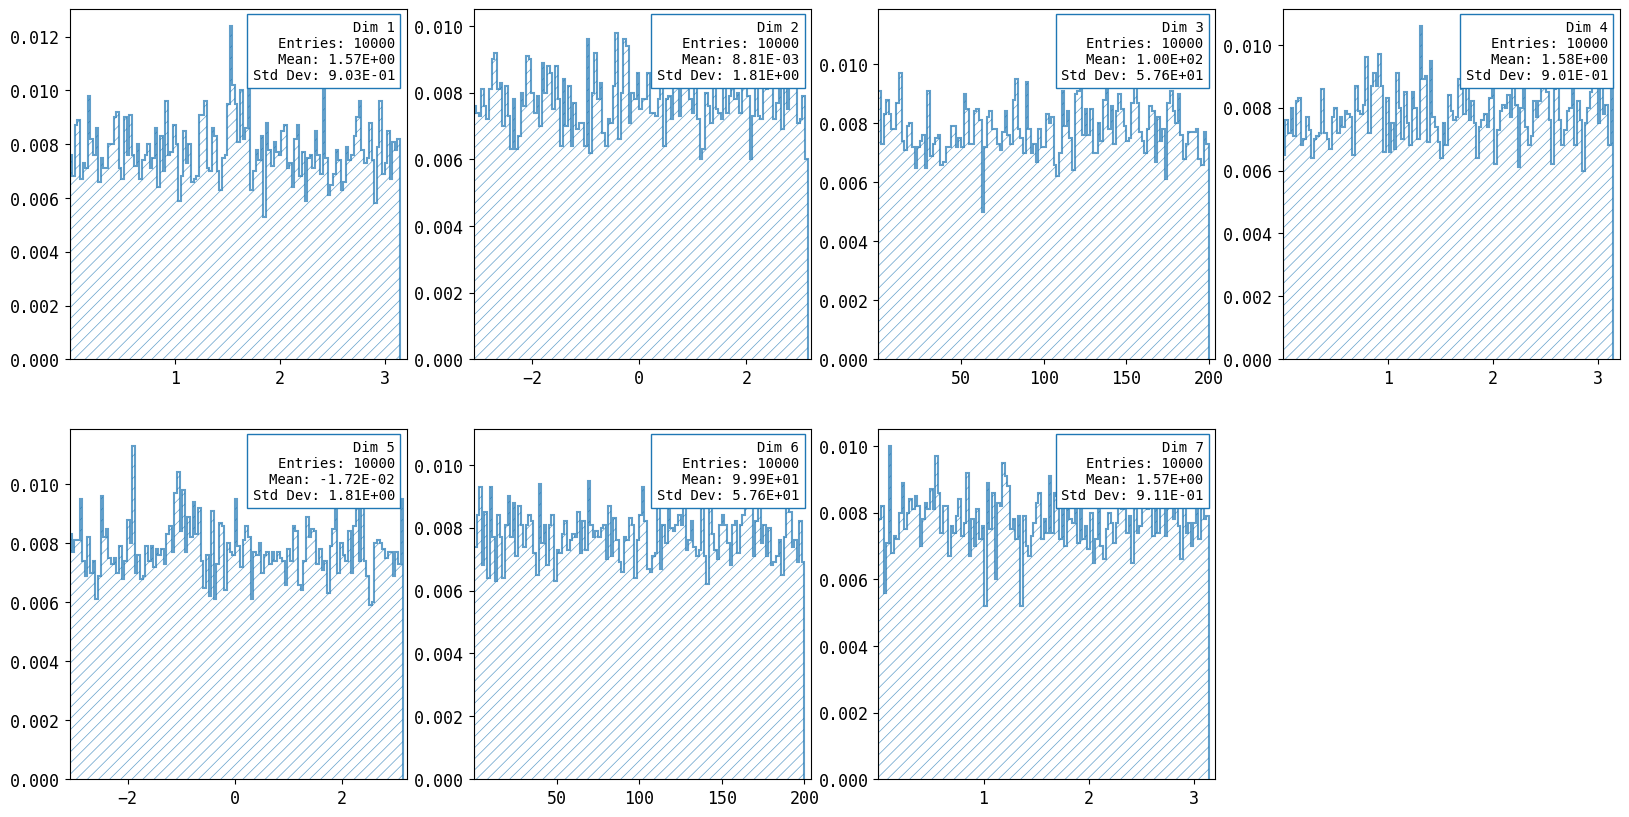

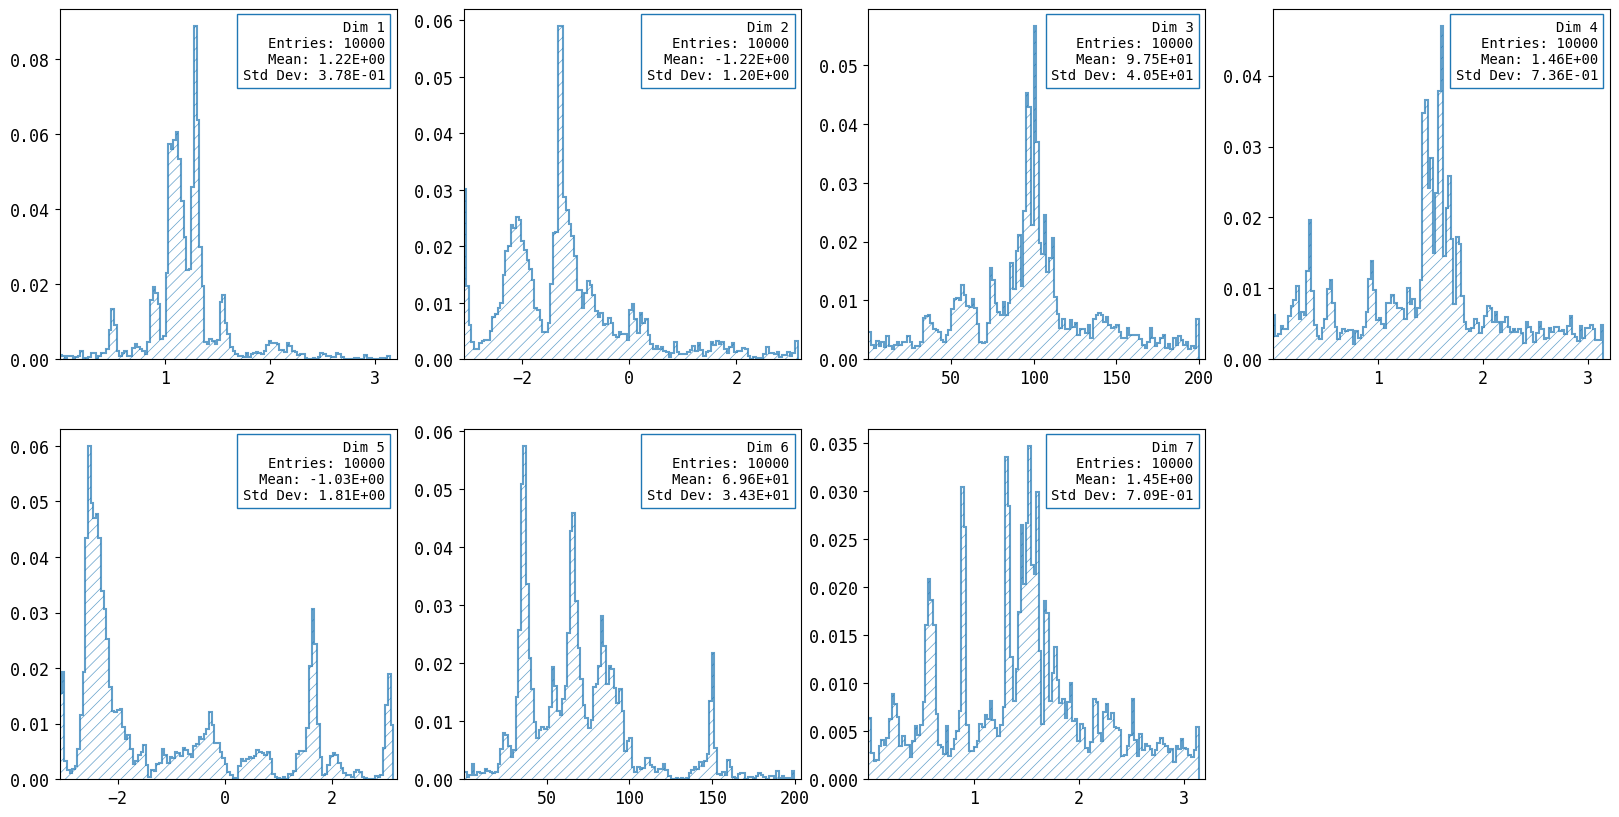

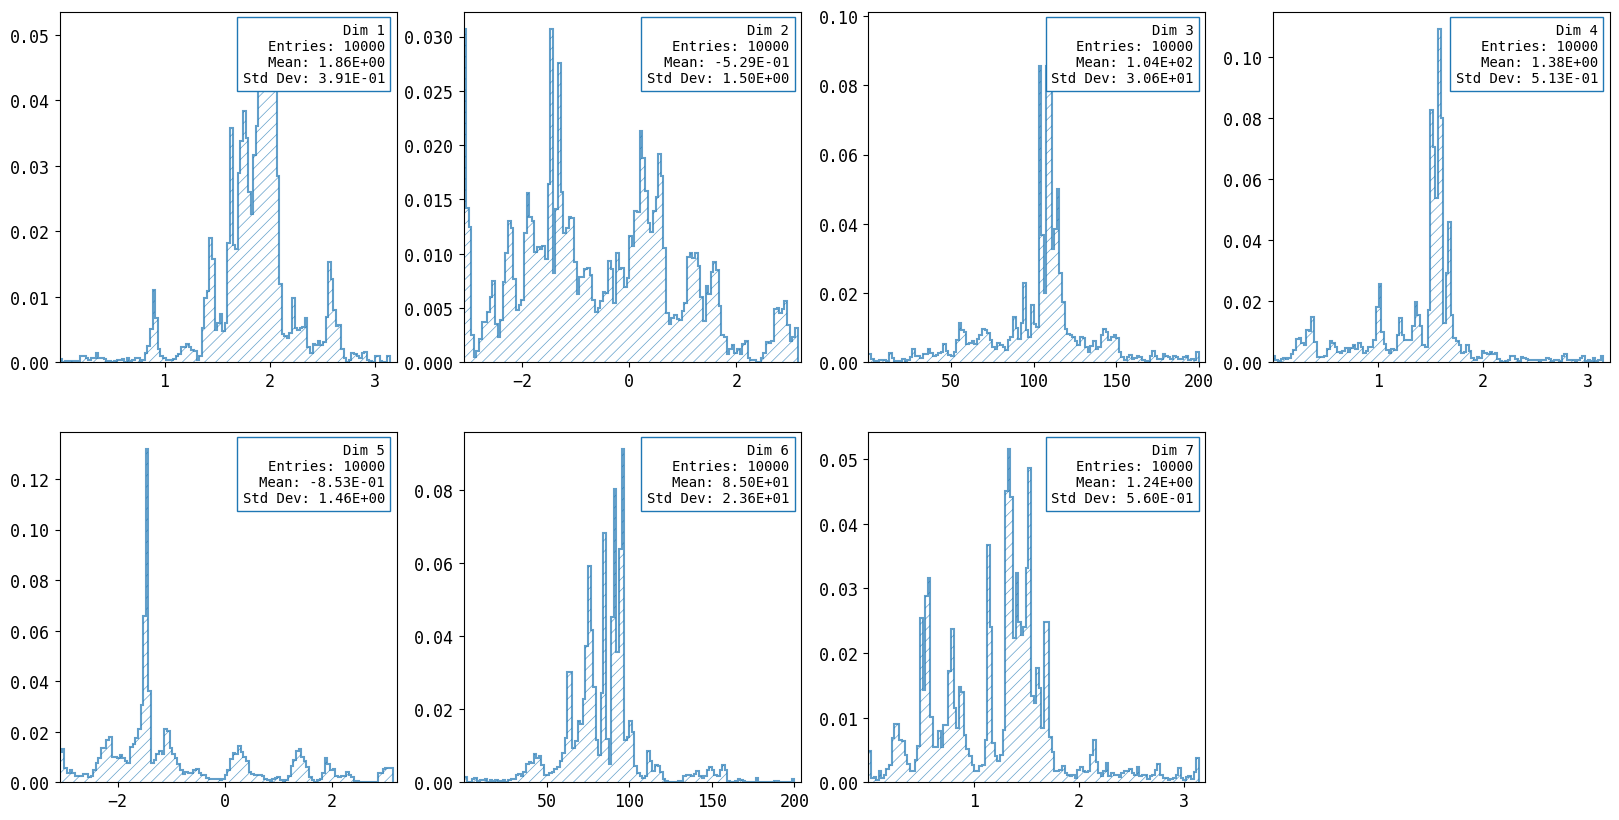

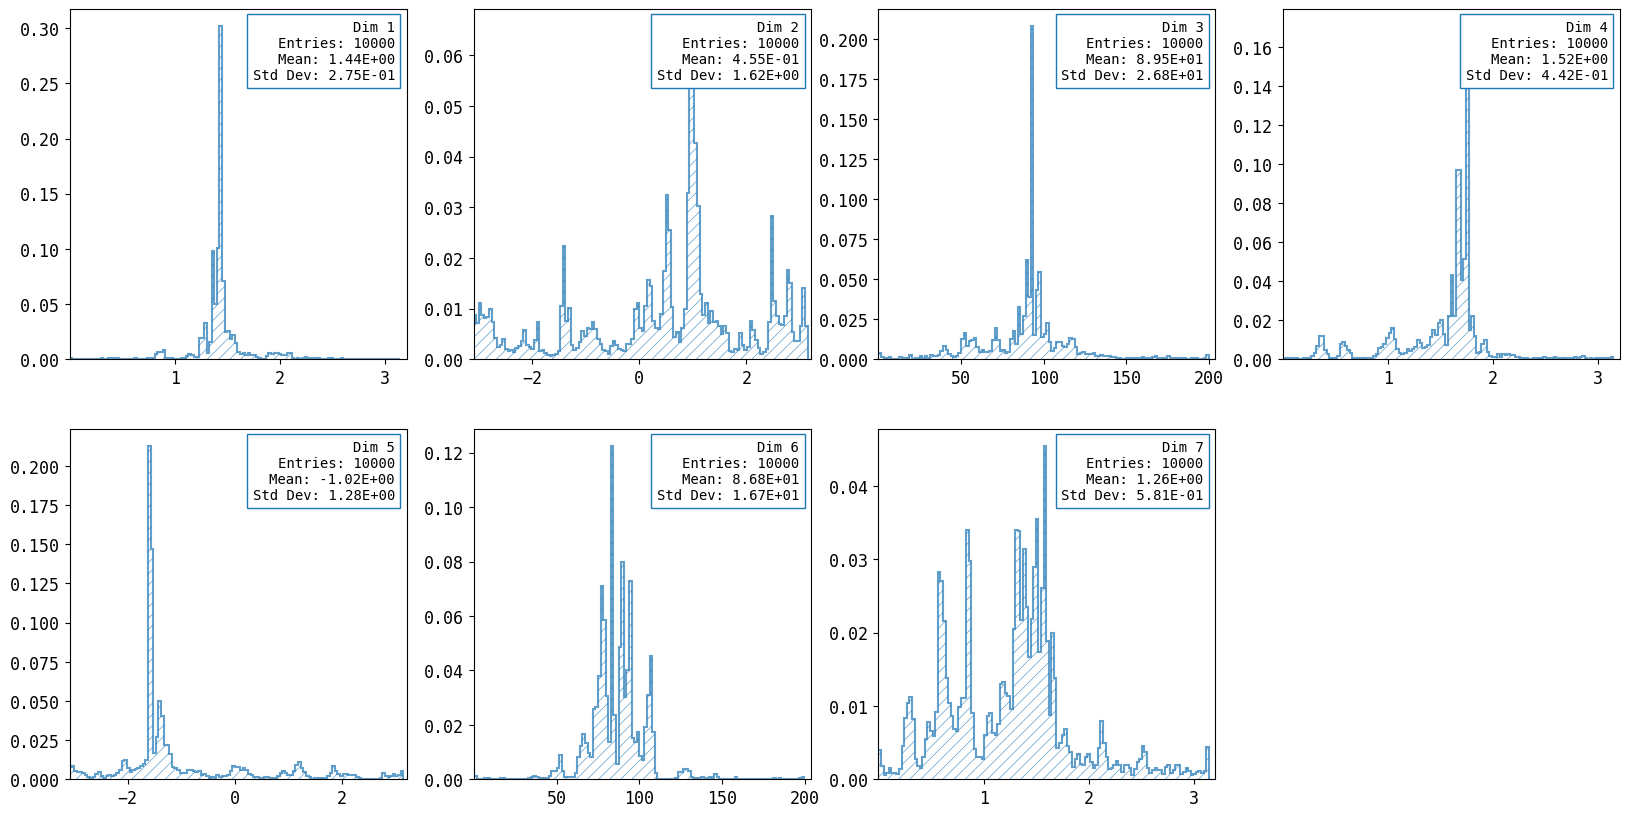

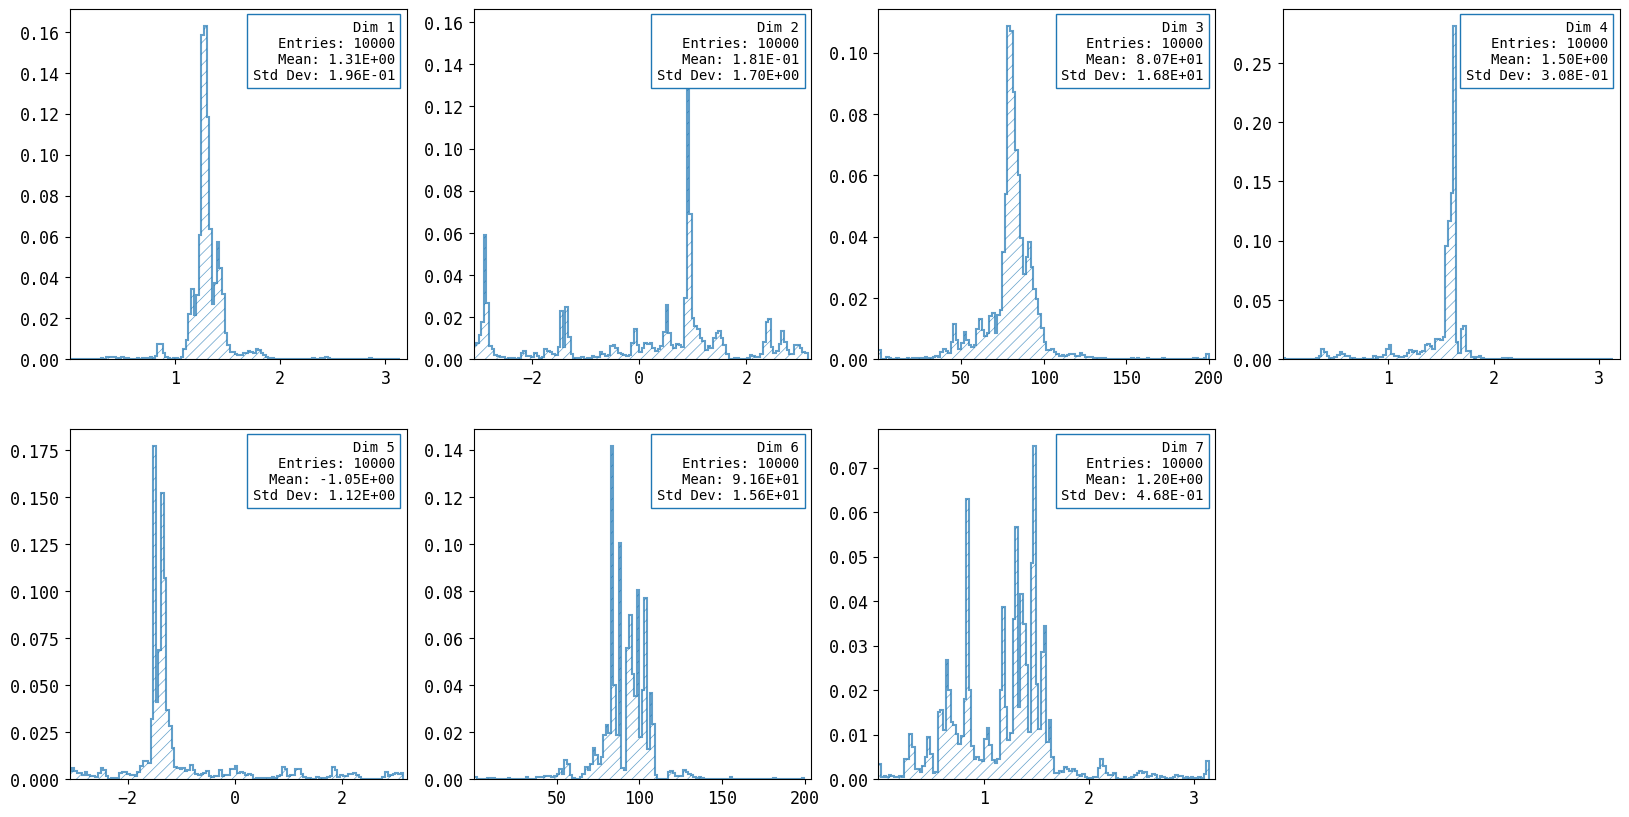

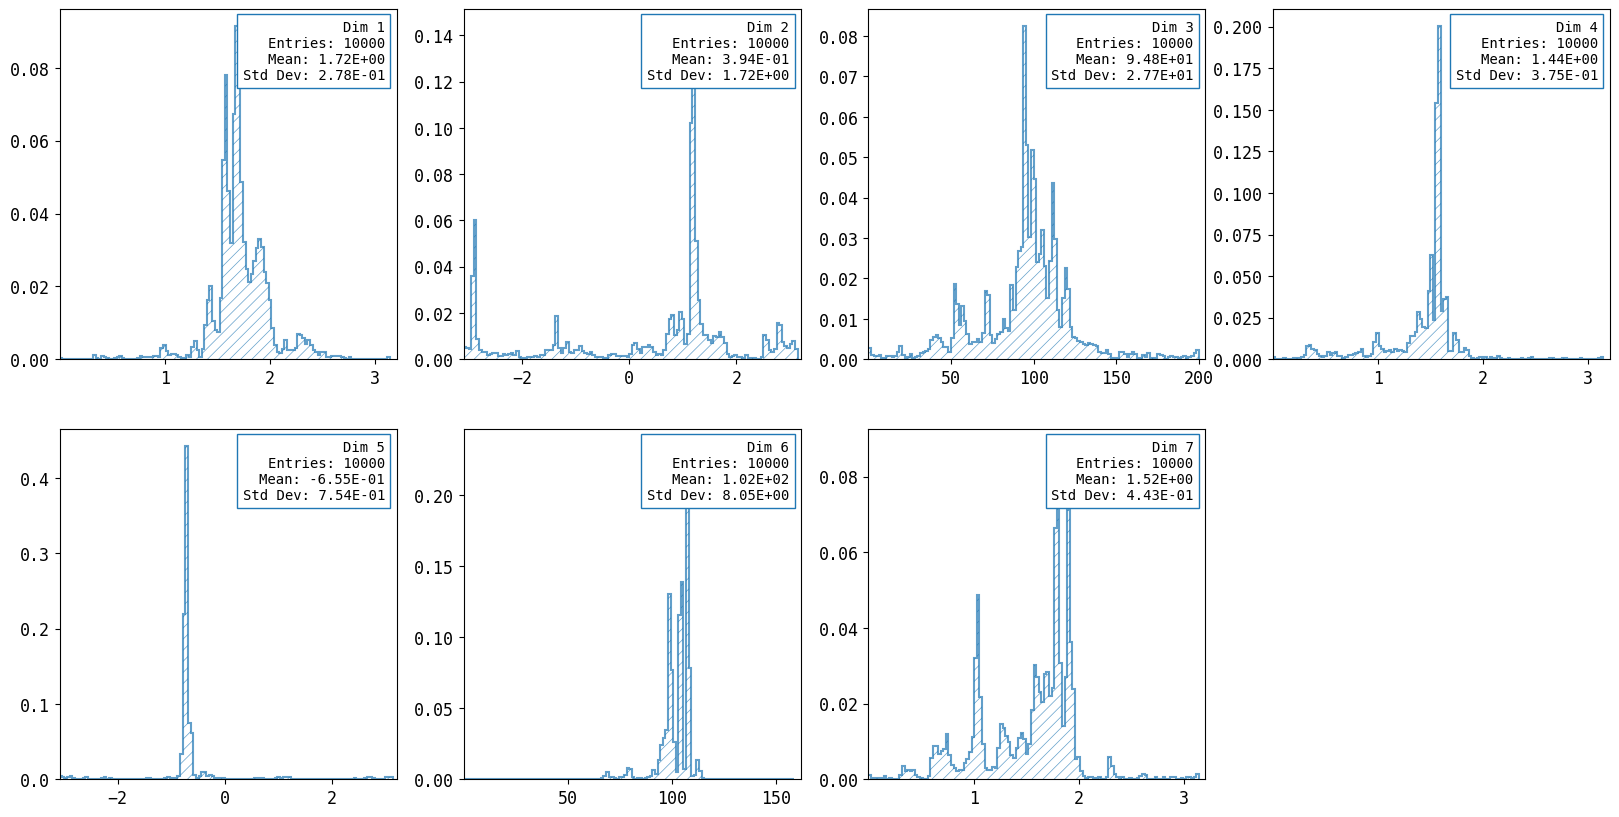

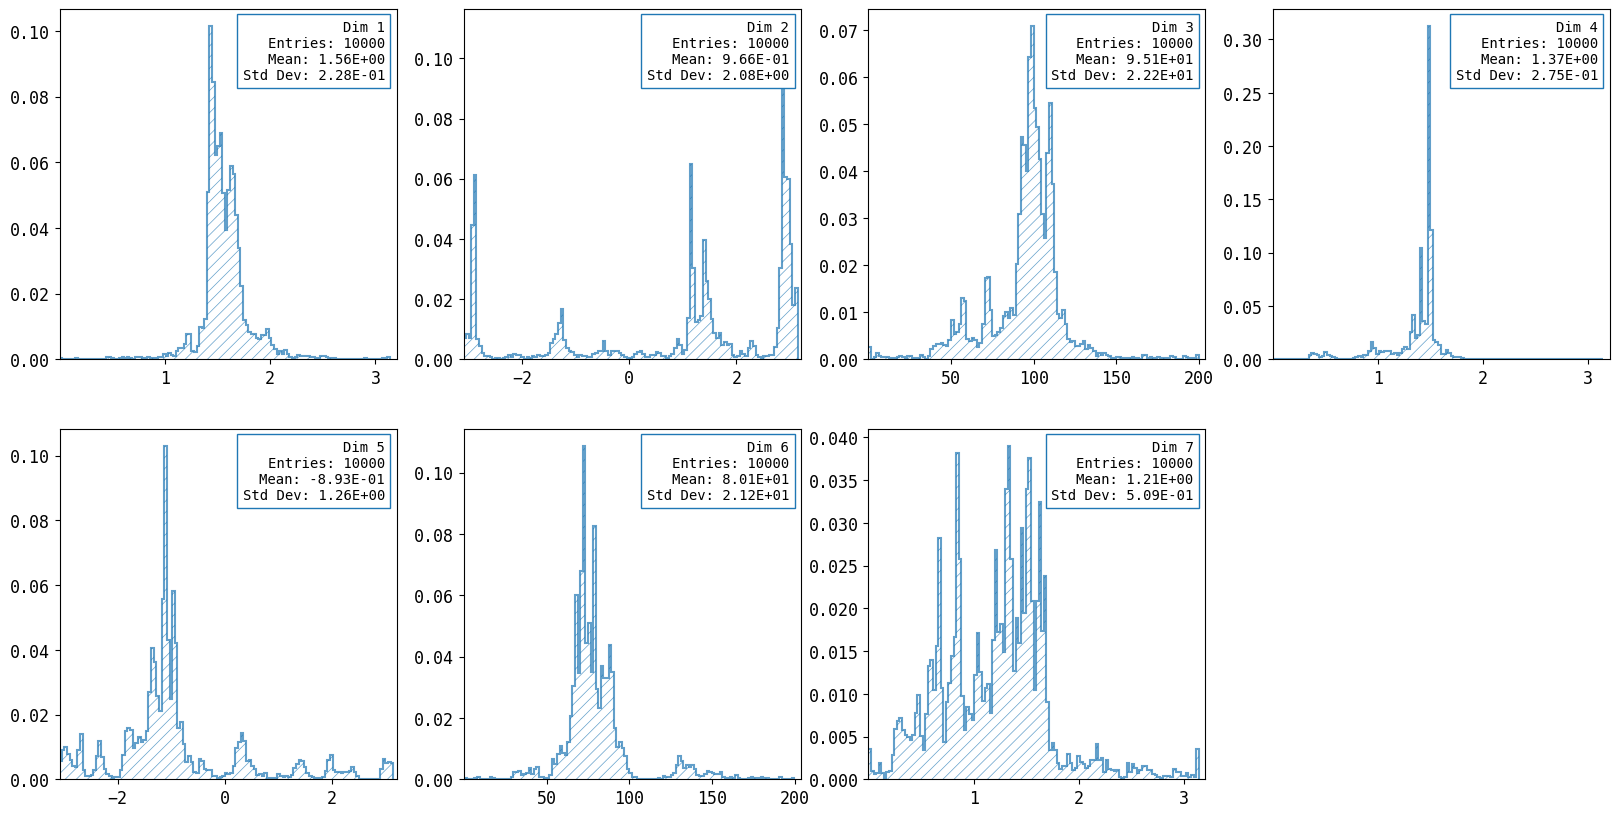

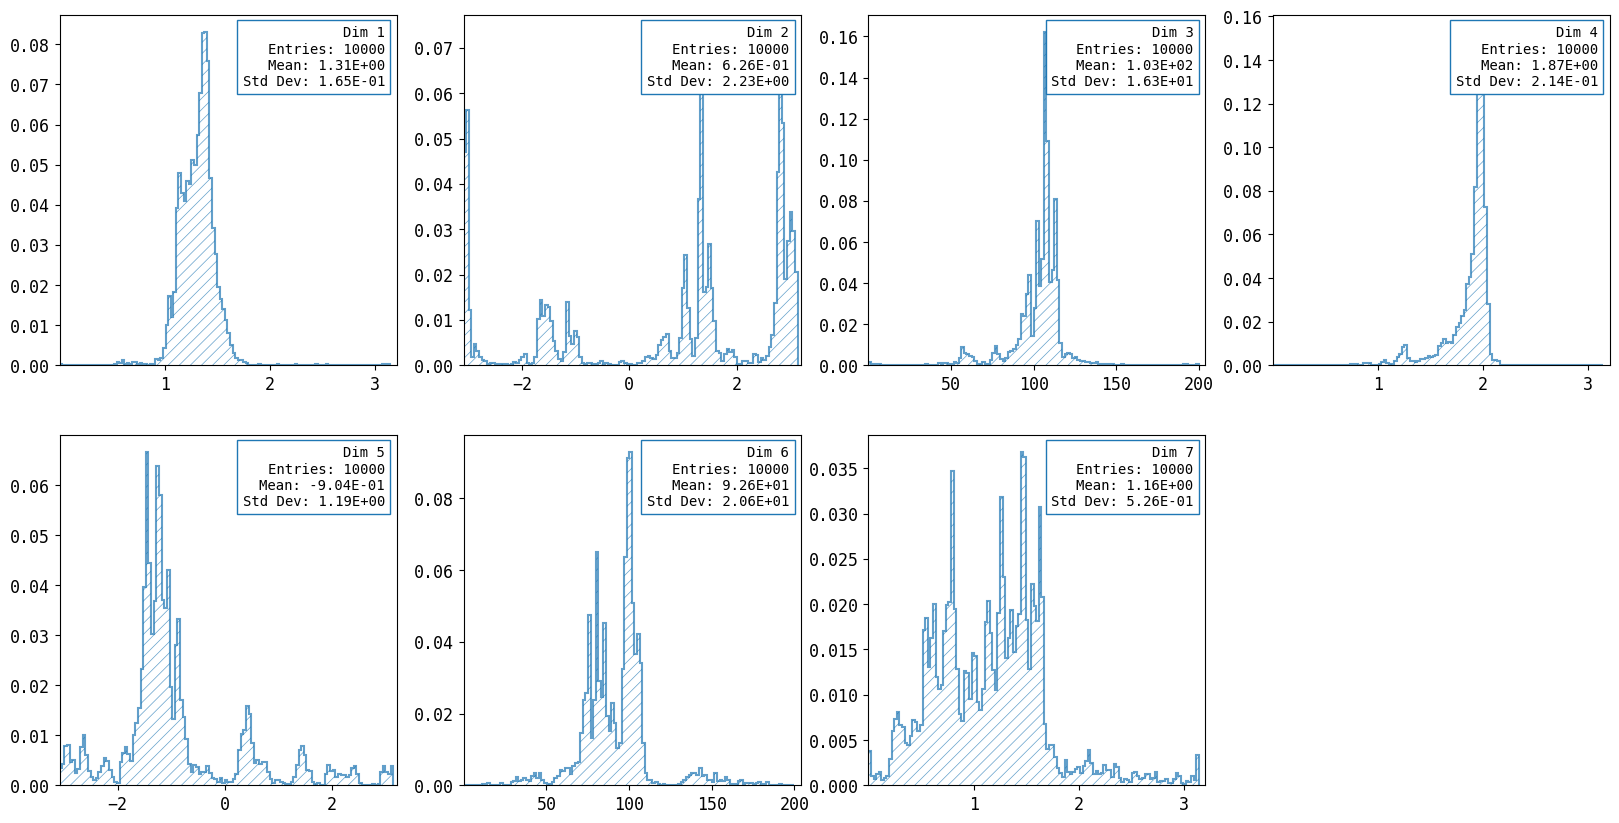

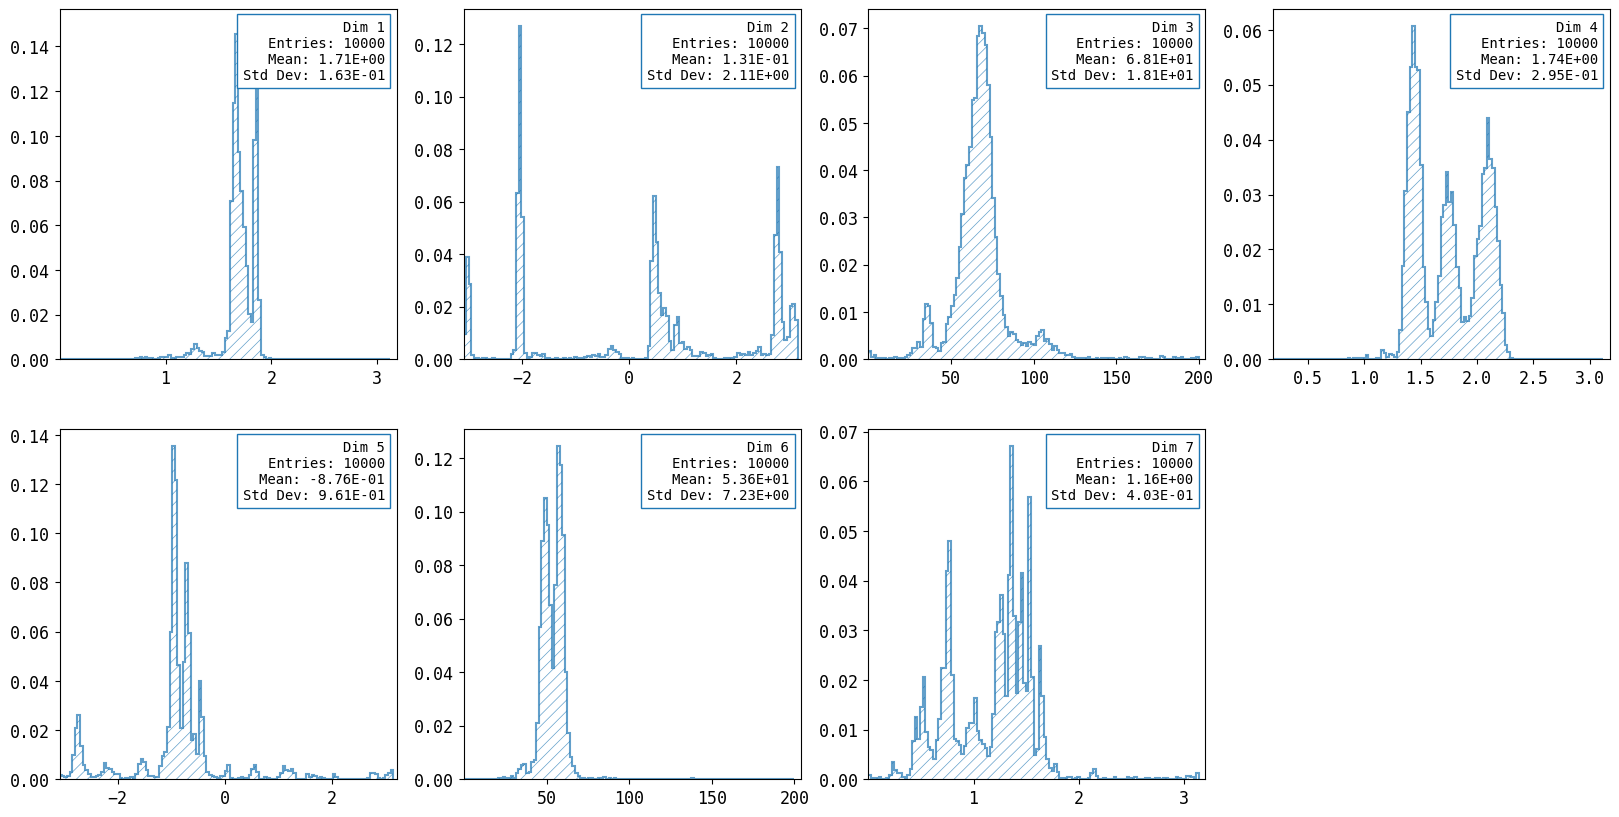

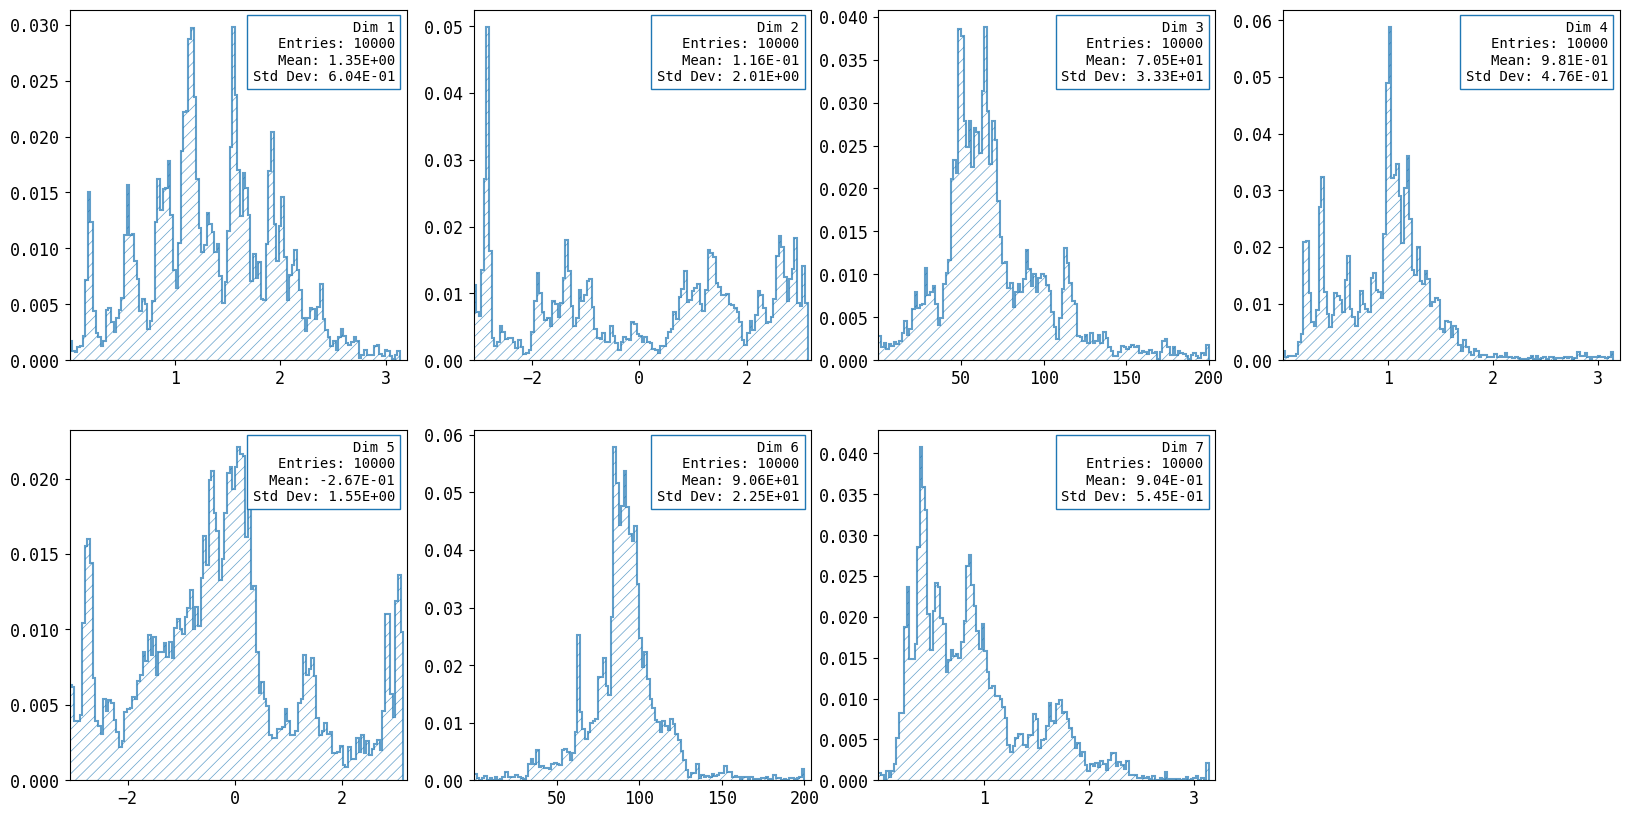

In [13]:
#@tf.function(input_signature=[tf.TensorSpec(None, tf.double)])
#def integrand(vals):
#    tf.numpy_function(test, [vals], tf.double, name='integrand')

integrate = build_integrator(dist, integrand, lr=1e-3, integrator_args={ 'loss_func': 'chi2' } )
means, stddevs, losses = train_iflow(integrate, 5000, 500, plot_marginals, test_callback_freq=50)

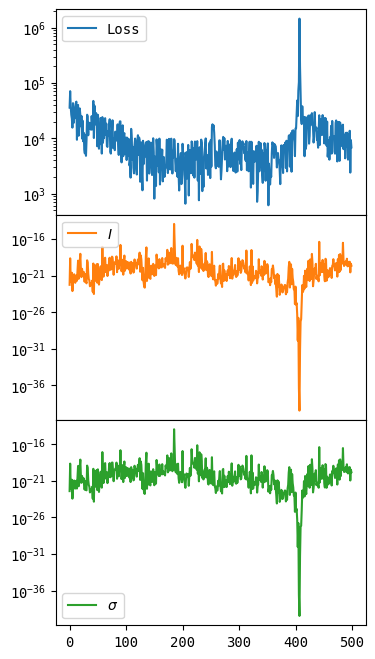

: 

: 

: 

In [17]:
from analysis.plot_matplotlib import get_colorpalette

yscale = 'log'

palette = get_colorpalette()
fig, ax = plt.subplots(3, 1, figsize=(4,8), gridspec_kw={'hspace': 0, 'wspace': 0})
ax[0].plot(np.arange(len(losses)), losses, label=r'Loss', color=palette[0])
ax[0].set_xlabel(r'Epoch')

ax[1].plot(np.arange(len(means)), means, label=r'$I$', color=palette[1])
ax[2].plot(np.arange(len(stddevs)), stddevs,label=r'$\sigma$', color=palette[2])

for i in range(3):
    ax[i].set_yscale(yscale)

for i in range(len(ax)):
    ax[i].legend(loc='best')
    
#print(f'Estimate: {nis.evaluate()}')